## Задание
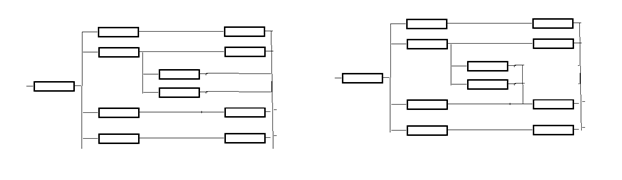

## Ход работы
$$\lambda = 10^{-4}$$
$$t=0.1..50000$$
$$p(t)=e^{-\lambda*t}$$
$$q(t)=1-p(t)$$


In [8]:
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [12]:
lmbd = 10**(-4)
t1 = 0.1
t2 = 50000

def p(t):
    return math.e ** (-lmbd * t)

def q(t):
    return 1 - p(t)

# Первая схема

## Формулы

### Параллельные переменные 

Рассчитаем функцию отказа одной переменной

1. Функция работоспособности одного элемента = $p(t)$
2. Функция отказа одного элемента = $1-p(t)$

Рассчитаем функцию отказа 2-х переменных

1. Функция отказа обоих элементов = $(1 - p(t))^2$
2. Функция работоспособности двух параллельных элементов = $1-(1-p(t))^2$

Рассчитаем функцию отказа для 3-х переменных

1. Функция работоспособности трех параллельных элементов = $1-(1-p(t))^3$
2. Функция отказа трех элементов = $(1 - p(t))^3$

### Последовательные переменные 

Рассчитаем функцию отказа одинаковых переменных

1. Функция работоспособности одного элемента = $p(t)$
2. Функция работоспособности двух элементов = $p(t)^2$

Рассчитаем функцию отказа разных переменных

2. Функция работоспособности двух элементов = $p(t)^2*(2-p(t))$


## Шаг 1

Заменим __параллельные__ элементы на один элемени с сохранением функции отказа:

![step1.png](step1.png)


## Шаг 2

Заменим __последовательные__ элементы на один элемени с сохранением функции отказа:

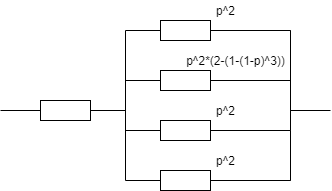


## Шаг 3

Снова заменим __параллельные__ элементы на один элемени с сохранением функции отказа:

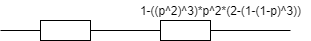

## Шаг 4

Снова заменим __последовательные__ элементы на один с сохранением функции отказа:

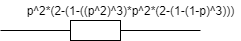

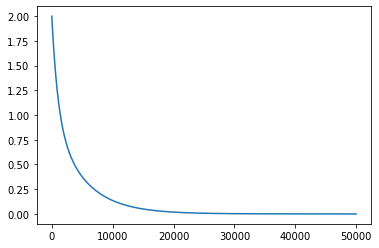

In [15]:
x = np.arange(t1, t2, 0.1)
y = p(x)**2 * ( 2 - ( 1 - ( (p(x)**2)**3 ) * p(x)**2 * ( 2 - ( 1 - ( 1 - p(x) )**3) ) ) )
plt.plot(x, y)
plt.show()

# Вторая схема

## Шаг 1

Заменим параллельные элементы на один элемени с сохранением функции отказа:

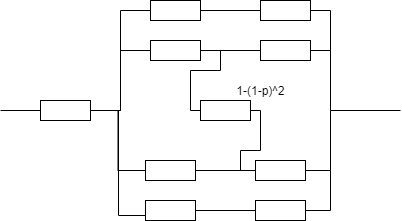

## Шаг 2

Заменим последовательные элементы на один элемени с сохранением функции отказа:

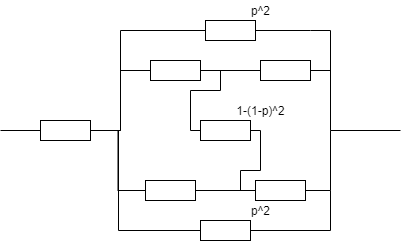

## Шаг 3

Заменим параллельные элементы на один элемени с сохранением функции отказа:

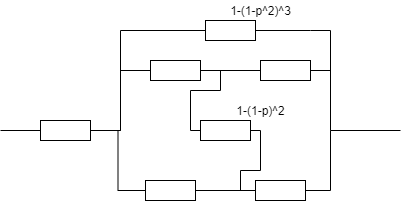

Для этой схемы больше нельзя сделать преобразований

# Метод декомпозиции

Воспользуемся методом декомпозиции для выделенной подсхемы:

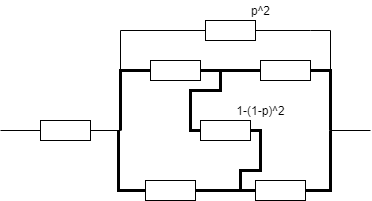


Разлодение мостиковой схемы относительно особого элемента:

$$ Pc = (1 - (1 - p)^2) * (1 - (1 - p)^2)^2 + (1 - (1 - (1 - p)^2)) * (1 - (1 - p^2)^2) = (1 - (1 - p)^2)^3 + (1 - p)^2 (1 - (1 - p^2)^2)$

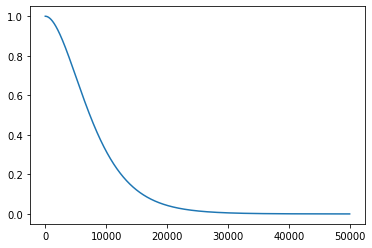

In [20]:
y1 = (1 - (1 - p(x) )**2)**3 + (1 - p(x) )**2 * (1 - (1 - p(x)**2)**2)
plt.plot(x, y1)
plt.show()

# Метод минимальных путей

Минимальные пути:

## Путь 1

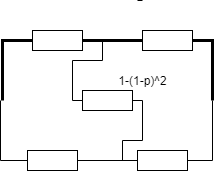

## Путь 2

![way2.png](way2.png)

## Путь 3

![way3.png](way3.png)

## Путь 4

![way4.png](way4.png)

## Оценка снизу:

$$ Pc <= 1 - (1 - p^2)^2 * (1 - p^2 * (1 - (1 - p)^2))^2 $$

## Оценка сверху

$$ q_{cp} = 1-p_{cp} = 1 - (1 - (1 - p)^2) $$

$$ Pc >= (1 - q^2)^2 * (1 - q^2* q_{ср} )))^2$$

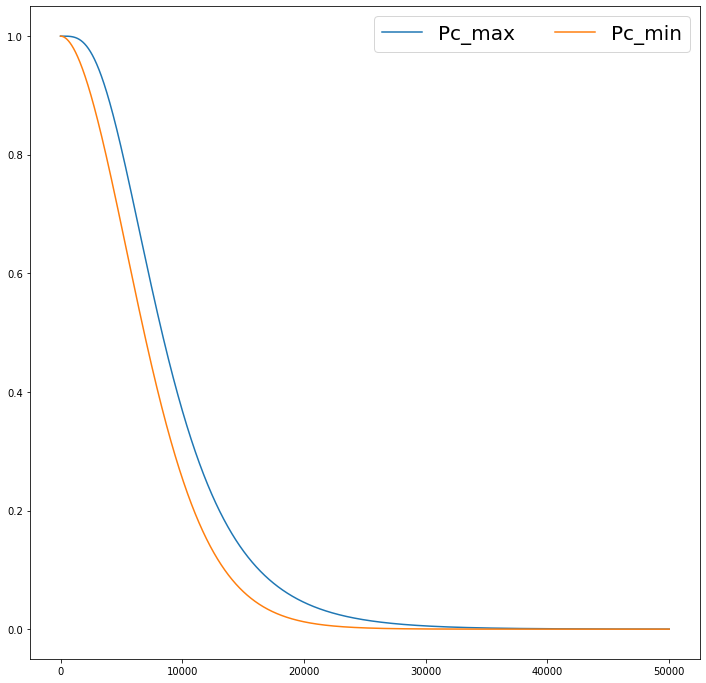

In [70]:
pc1_1 = 1 - (1 - p(x)**2)**2 * (1 - p(x)**2 * (1 - (1 - p(x))**2))**2
pc1_2 =  (1 - q(x)**2)**2 * (1 - q(x)**2 * (1 - (1 - (1 - p(x))**2)))**2

fig, ax = plt.subplots()

ax.plot(x, pc1_1, label="Pc_max")
ax.plot(x, pc1_2, label="Pc_min")

ax.legend(fontsize = 20,
          ncol = 2,   
          title_fontsize = '14' 
         )

fig.set_figwidth(12)
fig.set_figheight(12)

plt.show()

# Метод минимальных сечений

Послежлвательное соединение минимальных сечений

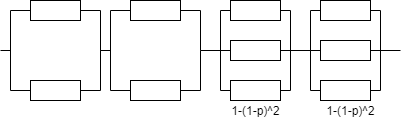

## Оценка снизу:

$$ Pc <= 1 - (1 - p^2)^2 * (1 - p^2 * (1 - (1 - p)^2))^2 $$

## Оценка сверху

$$ Pc >= (1 - q^2)^2 * (1 - q^2* q_{ср} )))^2, где  q_{cp} = 1-p_{cp} = 1 - (1 - (1 - p)^2) $$

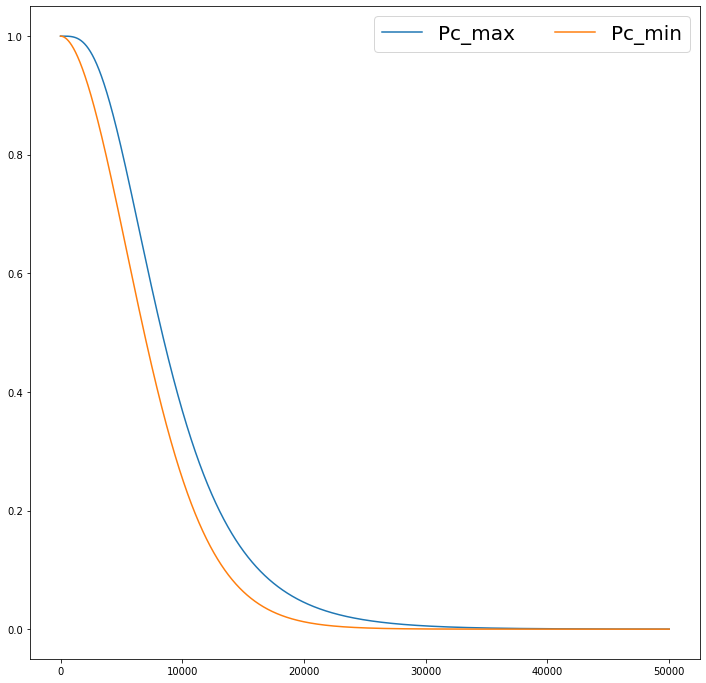

In [71]:
pc2_1 = 1 - (1 - p(x)**2)**2 * (1 - p(x)**2 * (1 - (1 - p(x))**2))**2
pc2_2 =  (1 - q(x)**2)**2 * (1 - q(x)**2 * (1 - (1 - (1 - p(x))**2)))**2

fig, ax = plt.subplots()

ax.plot(x, pc2_1, label="Pc_max")
ax.plot(x, pc2_2, label="Pc_min")

ax.legend(fontsize = 20,
          ncol = 2,   
          title_fontsize = '14' 
         )

fig.set_figwidth(12)
fig.set_figheight(12)

plt.show()

# Метод Литвака-Ушакова

1) Находим множество минимальных путей

2) Находим множество минимальных сечений

3) формироание вариантов множеств непересекающихся минимальных путей

4) Формирования вариантов множеств непересекающихся минимальных сечений

5) Все варианты непересекающихся минимальных путей представим в виде параллельного соединения минимальных путей.

6) Все варианты непересекающихся минимальных путей представим в виде последовательного соединения минимальных путей.

7) Определить погрешность расчета

8) Оценить

Максимальное из:

1: 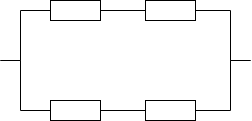

2: ![max2-3.png](max2-3.png)

3: ![max2-3.png](max2-3.png)

Минимальное из:
    
1: 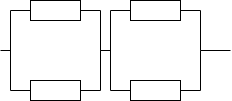

2: ![min2-3.png](min2-3.png)

3: ![min2-3.png](min2-3.png)

## Минимальные непересекающиеся пути

Нумерация системы:

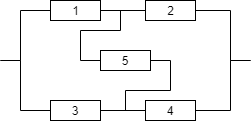

{{1,3}, {2,4}}; {1,5,4}; {2,5,3}

## Минимальные непересекающиеся сечения

{{1,2}, {3, 4}}; {1,5,4}; {2,5,3}

## Оценка снизу

$$ P_c >= Max( 1 - (1-p^2)^2;
              p^2 * (1-(1-p)^2);
              p^2 * (1-(1-p)^2)
$$

## Оценка сверху

$$ P_c <= Min( (1 - q^2)^2;
               (1 - q^2 * (1 - (1-(1-p)^2));
               (1 - q^2 * (1 - (1-(1-p)^2)))
$$

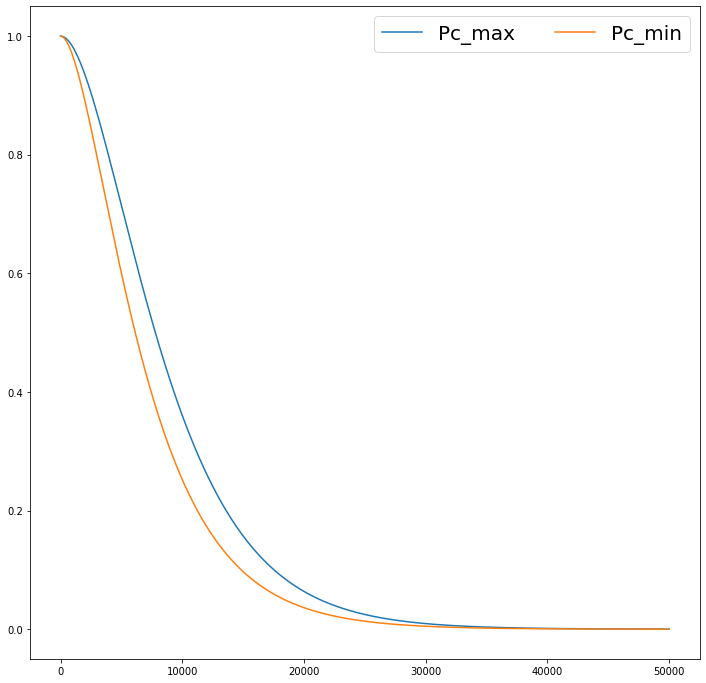

In [76]:
if 1 - (1-p((t2-t1)/2)**2)**2 > p((t2-t1)/2)**2 * (1-(1-p((t2-t1)/2))**2):
    pc3_1 =  1 - (1-p(x)**2)**2
else:
    pc3_1 = p(x)**2 * (1-(1-p(x))**2)
                     
if (1 - q((t2-t1)/2)**2)**2 > (1 - q((t2-t1)/2)**2 * (1 - (1-(1-p((t2-t1)/2))**2))):
    pc3_2 =  (1 - q(x)**2 * (1 - (1-(1-p(x))**2)))
else:
    pc3_2 = (1 - q(x)**2)**2
    
fig, ax = plt.subplots()

ax.plot(x, pc3_2, label="Pc_max")
ax.plot(x, pc3_1, label="Pc_min")

ax.legend(fontsize = 20,
          ncol = 2,   
          title_fontsize = '14' 
         )

fig.set_figwidth(12)
fig.set_figheight(12)

plt.show()

# Сравнение различных методов



/home/marina/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


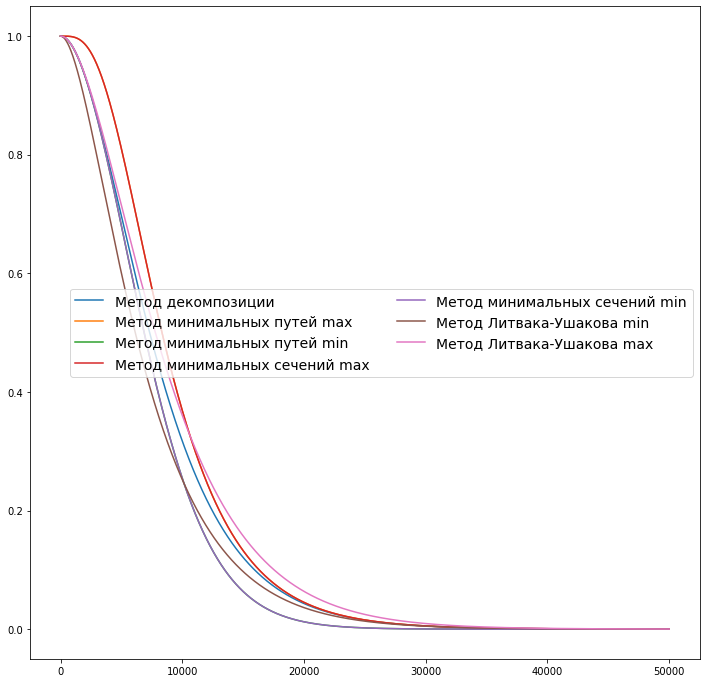

In [78]:
fig, ax = plt.subplots()

ax.plot(x, y1, label="Метод декомпозиции")
ax.plot(x, pc1_1, label="Метод минимальных путей max")
ax.plot(x, pc1_2, label="Метод минимальных путей min")
ax.plot(x, pc2_1, label="Метод минимальных сечений max")
ax.plot(x, pc2_2, label="Метод минимальных сечений min")
ax.plot(x, pc3_1, label="Метод Литвака-Ушакова min")
ax.plot(x, pc3_2, label="Метод Литвака-Ушакова max")

ax.legend(fontsize = 14,
          ncol = 2,   
          title_fontsize = '14' 
         )

fig.set_figwidth(12)
fig.set_figheight(12)

plt.show()